In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Data Splits

In [3]:
dataset = pd.read_csv("data_1.csv")

In [4]:
#converting int to 1 and ass to 0
dataset.TYPE[dataset.TYPE == 'int'] = 1
dataset.TYPE[dataset.TYPE == 'ass'] = 0

/tmp/ipykernel_5961/219339958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.TYPE[dataset.TYPE == 'int'] = 1
/tmp/ipykernel_5961/219339958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.TYPE[dataset.TYPE == 'ass'] = 0


In [5]:
# input
X = dataset.iloc[:, [4, 6, 7, 8, 9, 10, 11, 12, 13, 14]].values
# output
y = dataset.iloc[:, 15].values.astype('int')

In [6]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Logistic Regrssion

In [7]:
acc_LR = []

for train, test in kfold.split(X, y):
    
    xtrain_lr = sc_x.fit_transform(X[train])
    xtest_lr = sc_x.transform(X[test])
    
    lr = LogisticRegression(max_iter=1000, random_state=0)
    
    lr.fit(xtrain_lr,y[train])
    target_predicted_lr = lr.predict(xtest_lr)
    acc_LR.append(accuracy_score(y[test], target_predicted_lr))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_LR), np.mean(acc_LR)))

Mean accuracy for 10-fold cross validation : 0.8247252747252748


# K-nearest neighbour

Text(0, 0.5, 'Error')

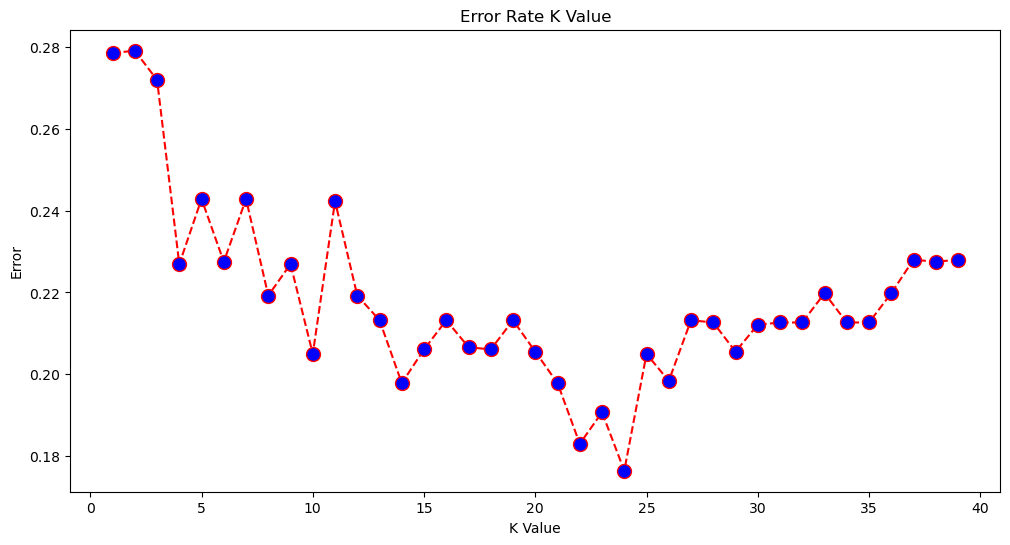

In [8]:
# Calculating error for K values between 1 and 40
error = []
for i in range(1, 40):
    error_i = []
    for train, test in kfold.split(X,y):
        xtrain_kn = sc_x.fit_transform(X[train])
        xtest_kn = sc_x.transform(X[test])
        
        
        kn = KNeighborsClassifier(n_neighbors=i)
        kn.fit(xtrain_kn,y[train])
        target_predicted_kn = kn.predict(xtest_kn)
        #print(target_predicted_kn)
        error_i.append(np.mean(target_predicted_kn != y[test]))
        
    error.append(np.mean(error_i))
        
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Error')

In [9]:
acc_KN = []

for train, test in kfold.split(X, y):
    
    xtrain_kn = sc_x.fit_transform(X[train])
    xtest_kn = sc_x.transform(X[test])
    
    kn = KNeighborsClassifier(n_neighbors=24)
    
    kn.fit(xtrain_kn,y[train])
    target_predicted_kn = kn.predict(xtest_kn)
    acc_KN.append(accuracy_score(y[test], target_predicted_kn))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_KN), np.mean(acc_KN)))

Mean accuracy for 10-fold cross validation : 0.8236263736263736


# Support vector classifier

In [10]:
acc_SVM = []

for train, test in kfold.split(X, y):
    
    xtrain_svm = sc_x.fit_transform(X[train])
    xtest_svm = sc_x.transform(X[test])
    
    svm = SVC(kernel='linear', random_state=0)
    
    svm.fit(xtrain_svm,y[train])
    target_predicted_svm = svm.predict(xtest_svm)
    acc_SVM.append(accuracy_score(y[test], target_predicted_svm))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_SVM), np.mean(acc_SVM)))

Mean accuracy for 10-fold cross validation : 0.8241758241758242


# Decision Tree Classifier

In [11]:
acc_DT = []

for train, test in kfold.split(X, y):
    
    xtrain_dt = sc_x.fit_transform(X[train])
    xtest_dt = sc_x.transform(X[test])
    
    dt = DecisionTreeClassifier(random_state=0)
    
    dt.fit(xtrain_dt,y[train])
    target_predicted_dt = dt.predict(xtest_dt)
    acc_DT.append(accuracy_score(y[test], target_predicted_dt))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_DT), np.mean(acc_DT)))

Mean accuracy for 10-fold cross validation : 0.7192307692307692


# Random Forest

In [7]:
acc_RF = []

for train, test in kfold.split(X, y):
    
    xtrain_rf = sc_x.fit_transform(X[train])
    xtest_rf = sc_x.transform(X[test])
    
    rf = RandomForestClassifier(max_depth = 2, min_samples_split=3, n_estimators=10, random_state=0)
    
    rf.fit(xtrain_rf,y[train])
    target_predicted_rf = rf.predict(xtest_rf)
    acc_RF.append(accuracy_score(y[test], target_predicted_rf))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_RF), np.mean(acc_RF)))

Mean accuracy for 10-fold cross validation : 0.8241758241758241


# Tuning random forest parameters using random search then grid search

In [8]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 2, stop = 10, num = 1)]
max_depth = [int(x) for x in np.linspace(2, 110, num = 11)]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'bootstrap': bootstrap}

print(random_grid)

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 22, cv = 10, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X, y)
rf_random.best_params_

{'n_estimators': [2], 'max_depth': [2, 12, 23, 34, 45, 56, 66, 77, 88, 99, 110], 'bootstrap': [True, False]}
Fitting 10 folds for each of 22 candidates, totalling 220 fits


{'n_estimators': 2, 'max_depth': 2, 'bootstrap': False}

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3,4,5,6,7,8,9,10],
    'n_estimators': [2,3,4,5,6,7,8,9,10]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)
grid_search.fit(X, y)
best_grid = grid_search.best_estimator_

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END ........bootstrap=True, max_depth=2, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=12, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=12, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=23, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=23, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=34, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=34, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=45, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=56, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=66, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=66, n_estimators=2; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=88, 

In [10]:
best_grid

RandomForestClassifier(max_depth=9, n_estimators=6)

In [7]:
acc_RF_1 = []

for train, test in kfold.split(X, y):
    
    xtrain_rf = sc_x.fit_transform(X[train])
    xtest_rf = sc_x.transform(X[test])
    
    rf_1 = RandomForestClassifier(max_depth = 2, n_estimators=10, random_state=0)
    
    rf_1.fit(xtrain_rf,y[train])
    target_predicted_rf = rf_1.predict(xtest_rf)
    acc_RF_1.append(accuracy_score(y[test], target_predicted_rf))
    #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_RF_1), np.mean(acc_RF_1)))

Mean accuracy for 10-fold cross validation : 0.8241758241758241


In [8]:
acc_RF_1

[0.9285714285714286,
 1.0,
 0.9285714285714286,
 0.7142857142857143,
 0.6428571428571429,
 0.6428571428571429,
 0.9230769230769231,
 0.7692307692307693,
 0.8461538461538461,
 0.8461538461538461]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

forest = RandomForestClassifier(max_depth =2, n_estimators=10, random_state=0)
forest.fit(X_train, y_train)
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)
print("Test accuracy : ", accuracy_score(y_test, y_pred_test))
print("Training accuracy : ", accuracy_score(y_train, y_pred_train))

Test accuracy :  0.8235294117647058
Training accuracy :  0.8725490196078431


In [15]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        20
           1       1.00      0.57      0.73        14

    accuracy                           0.82        34
   macro avg       0.88      0.79      0.80        34
weighted avg       0.86      0.82      0.81        34



In [16]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        60
           1       0.84      0.86      0.85        42

    accuracy                           0.87       102
   macro avg       0.87      0.87      0.87       102
weighted avg       0.87      0.87      0.87       102



# GMM Algorithm

In [13]:
# acc_gmm = []

# for train, test in kfold.split(X, y):
    
#     xtrain_gmm = sc_x.fit_transform(X[train])
#     xtest_gmm = sc_x.transform(X[test])
    
#     gmm = GaussianMixture(n_components = 2, random_state=0)
    
#     gmm.fit(xtrain_gmm,y[train])
#     target_predicted_gmm = gmm.predict(xtest_gmm)
#     print("test set       :",y[test])
#     print("predicted set  :",target_predicted_gmm)
#     # print(confusion_matrix(y[test], target_predicted_gmm))
#     # print(classification_report(y[test], target_predicted_gmm))
#     acc_gmm.append(accuracy_score(y[test], target_predicted_gmm))
#     #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

# print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_gmm), np.mean(acc_gmm)))

In [14]:
# acc_NB = []

# for train, test in kfold.split(X, y):
    
#     xtrain_nb = sc_x.fit_transform(X[train])
#     xtest_nb = sc_x.transform(X[test])
    
#     nb = GaussianNB(random_state=0)
    
#     nb.fit(xtrain_nb,y[train])
#     target_predicted_nb = nb.predict(xtest_nb)
#     print("test set       :",y[test])
#     print("predicted set  :",target_predicted_nb)
#     # print(confusion_matrix(y[test], target_predicted_gmm))
#     # print(classification_report(y[test], target_predicted_gmm))
#     acc_NB.append(accuracy_score(y[test], target_predicted_nb))
#     #print("Test set accuracy for {} cycle:{}".format(i+1,acc_LR[i]))

# print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_NB), np.mean(acc_NB)))

# Neural Network

In [21]:
import tensorflow as tf
import tensorflow

from tensorflow import keras
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

acc_NN = []
i = 0

for train, test in kfold.split(X,y):
    
    
    xtrain_nn = sc_x.fit_transform(X[train])
    xtest_nn = sc_x.transform(X[test])
    
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)
    model=keras.models.Sequential([
        
        keras.layers.Dense(512, input_dim = xtrain_nn.shape[1], activation='LeakyReLU'),  
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=512, activation='LeakyReLU'),  
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=256, activation='LeakyReLU'),   
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(units=128, activation='LeakyReLU'),
        keras.layers.Dense(units=1, activation="sigmoid"),])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005, decay=5e-4), loss='binary_crossentropy', metrics=['accuracy'])
    checkpoint_name = './NN_Checklist' + '/' + str(i) + '/Weights-{epoch:03d}--{val_loss:.5f}.h5'
    checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
    callbacks_list = [checkpoint]
    history = model.fit(xtrain_nn, y[train], epochs=400, validation_data=(xtest_nn, y[test]), callbacks=callbacks_list, verbose=0)
    
    # plt.plot(history.history['loss'])
    # plt.plot(history.history['val_loss'])
    # plt.title('model loss')
    # plt.ylabel('loss')
    # plt.xlabel('epoch')
    # plt.legend(['train', 'test'])
    # plt.show()
    #y_pred_nn = model.predict_classes(xtest_nn)
    y_pred_nn = model.predict(xtest_nn) > 0.5
    acc_NN.append(accuracy_score(y[test], y_pred_nn))
    
    i += 1

print("Mean accuracy for {}-fold cross validation : {}".format(len(acc_NN), np.mean(acc_NN)))

2022-10-21 15:13:20.083859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-21 15:13:20.536355: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-21 15:13:20.608018: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/anirudh/anaconda3/envs/igwn-py39/bin:/home/anirudh/local/src/lib:
2022-10-21 15:13:20.6080

1/1 [==============================] - 1s 610ms/step
Mean accuracy for 10-fold cross validation : 0.7505494505494505


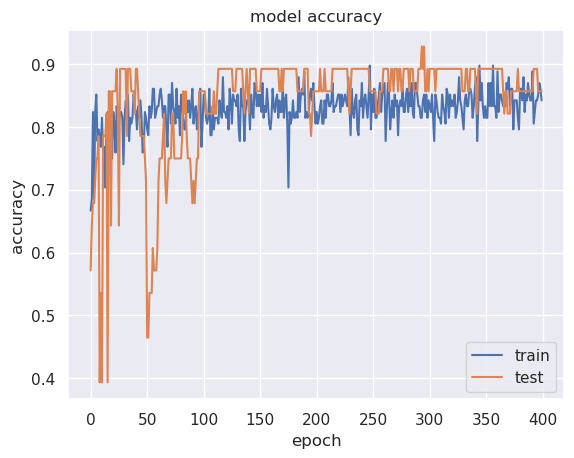

1/1 [==============================] - 0s 167ms/step


Text(109.44999999999997, 0.5, 'Actual label')

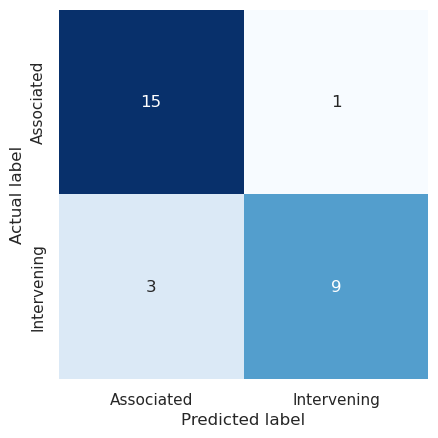

In [23]:
import seaborn as sns
sns.set()
 
xtrain_nn, xtest_nn, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#xtrain_nn = sc_x.fit_transform(x_train)
#xtest_nn = sc_x.transform(y_train)

tf.keras.backend.clear_session()
tf.random.set_seed(0)
model=keras.models.Sequential([

    keras.layers.Dense(512, input_dim = xtrain_nn.shape[1], activation='LeakyReLU'),  
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=512, activation='LeakyReLU'),  
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(units=256, activation='LeakyReLU'),   
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128, activation='LeakyReLU'),
    keras.layers.Dense(units=1, activation="sigmoid"),])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.005, decay=5e-4), loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_name = './NN_Checklist/model_2/Weights-{epoch:03d}--{val_loss:.5f}.h5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 0, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
history = model.fit(xtrain_nn, y_train, epochs=400, validation_data=(xtest_nn, y_test), callbacks=callbacks_list, verbose=0)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


y_pred_nn = model.predict(xtest_nn) > 0.5
mat = confusion_matrix(y_test, y_pred_nn)
labels = ['Associated', 'Intervening']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')